In [2]:
# Native libraries
import os
import math
# Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Preprocessing
from sklearn.preprocessing import MinMaxScaler
# Algorithms
from minisom import MiniSom
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
import dataframe_image as dfi

In [ ]:
qf = pd.read_csv('FINAL/final_/clustering/data_for_featuremap.csv')
hf = pd.read_csv('')

In [50]:
input_folder = 'FINAL/clustering/'
output_folder = 'FINAL/clustering/'

In [51]:
df19 = pd.read_csv(input_folder+'feature1_2019.csv')
df20 = pd.read_csv(input_folder+'feature1_2020.csv')

df19['Unnamed: 0'] = pd.to_datetime(df19['Unnamed: 0'],format = '%H:%M:%S')
df19.index = df19['Unnamed: 0'].dt.time
df19 = df19.drop(['Unnamed: 0'],axis=1)
df20['Unnamed: 0'] = pd.to_datetime(df20['Unnamed: 0'],format = '%H:%M:%S')
df20.index = df20['Unnamed: 0'].dt.time
df20 = df20.drop(['Unnamed: 0'],axis=1)

In [61]:
df20['MH18']

Unnamed: 0
00:00:00    0.0
00:15:00    0.0
00:30:00    0.0
00:45:00    0.0
01:00:00    0.0
           ... 
22:45:00    0.0
23:00:00    0.0
23:15:00    0.0
23:30:00    0.0
23:45:00    0.0
Name: MH18, Length: 96, dtype: float64

In [25]:
# change the year and filename acc.
fig20 = df20.style.background_gradient(cmap ='Reds').set_properties(**{'font-size': '20px'})
dfi.export(fig20, output_folder+'feature_map_2020_tobesure.png')


In [77]:
mySeries = []
names = []
for col in list(df19.columns):
    mySeries.append(df19[col])
    names.append(col)

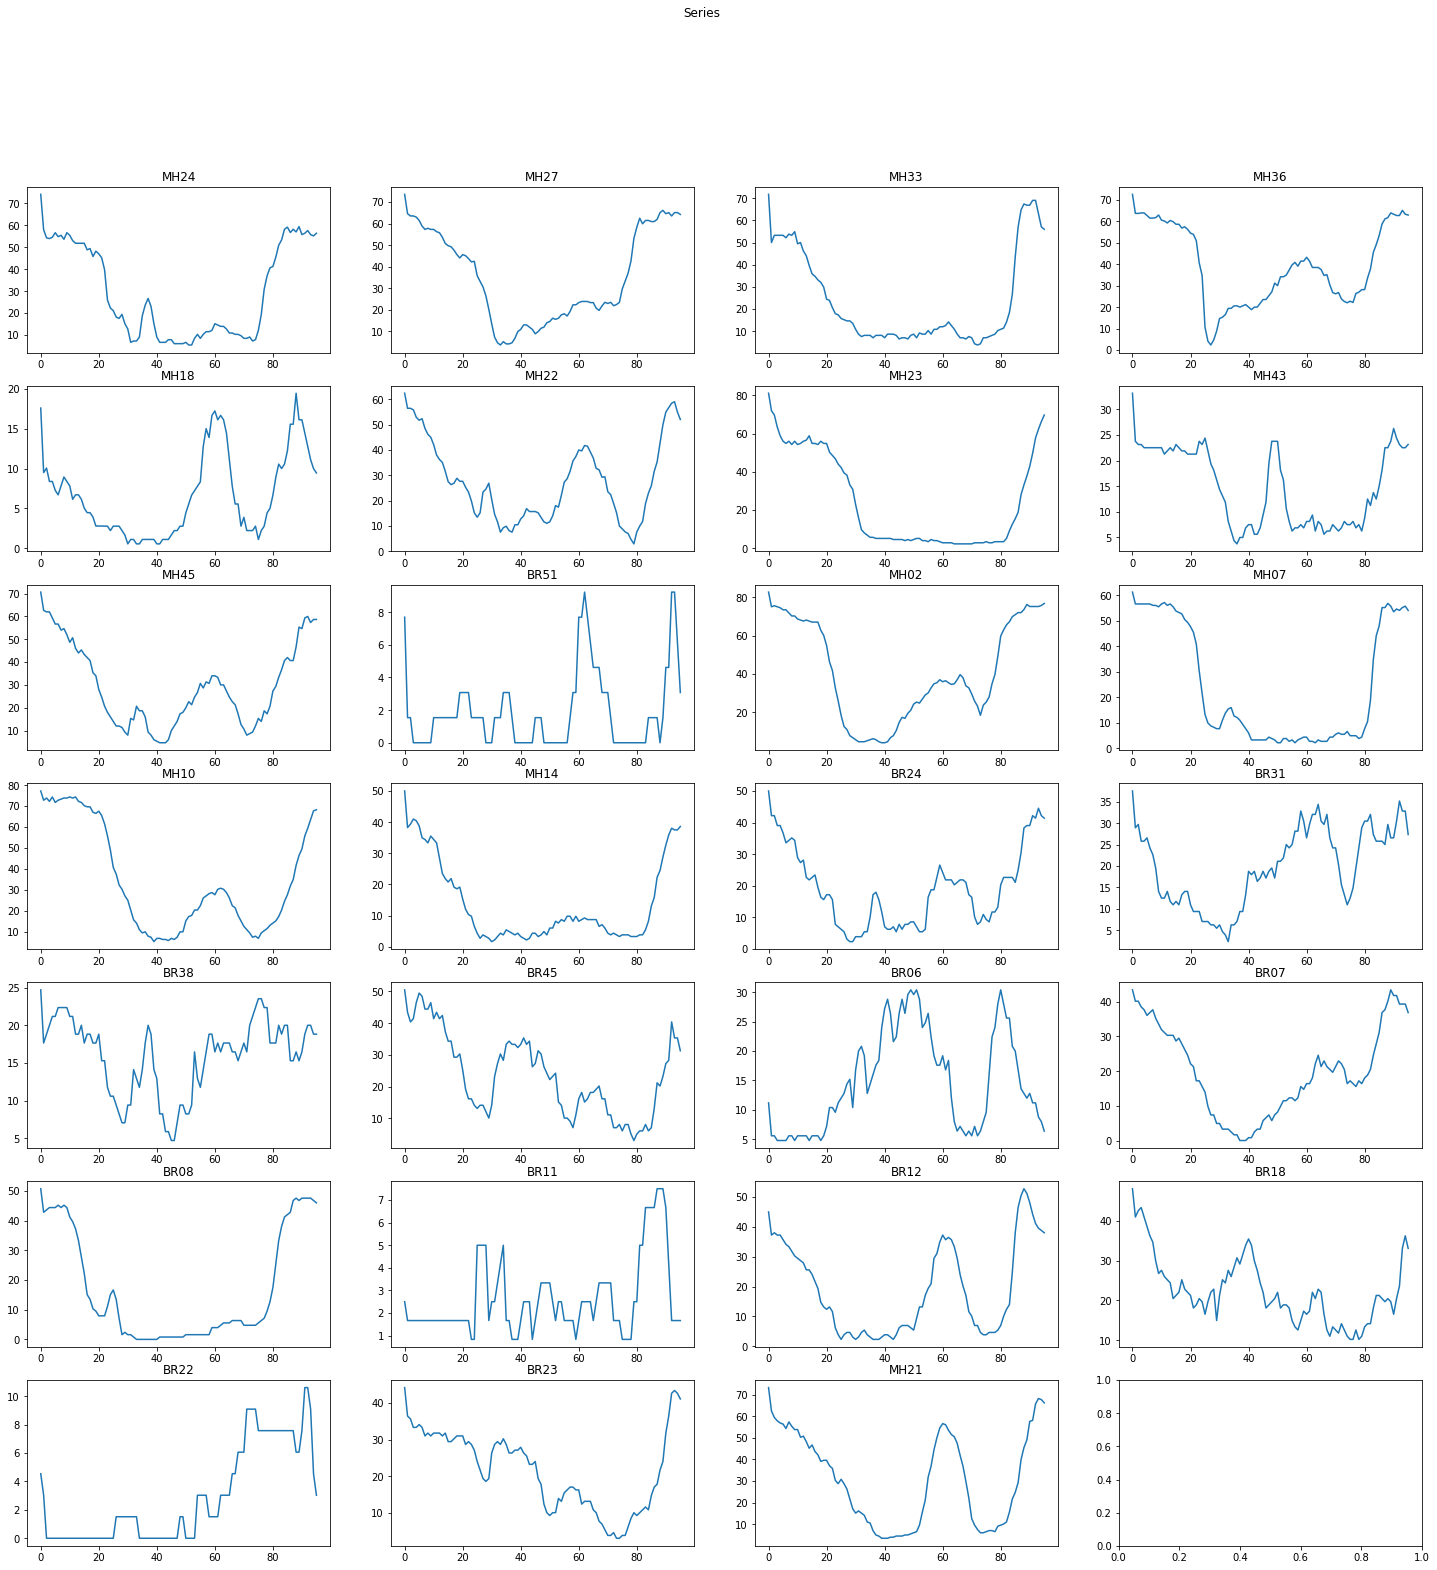

In [78]:
fig, axs = plt.subplots(7,4,figsize=(25,25))
fig.suptitle('Series')
for i in range(7):
    for j in range(4):
        if i*4+j+1>len(mySeries): # pass the others that we can't fill
            continue
        axs[i, j].plot(mySeries[i*4+j].values)
        axs[i, j].set_title(names[i*4+j])
plt.show()

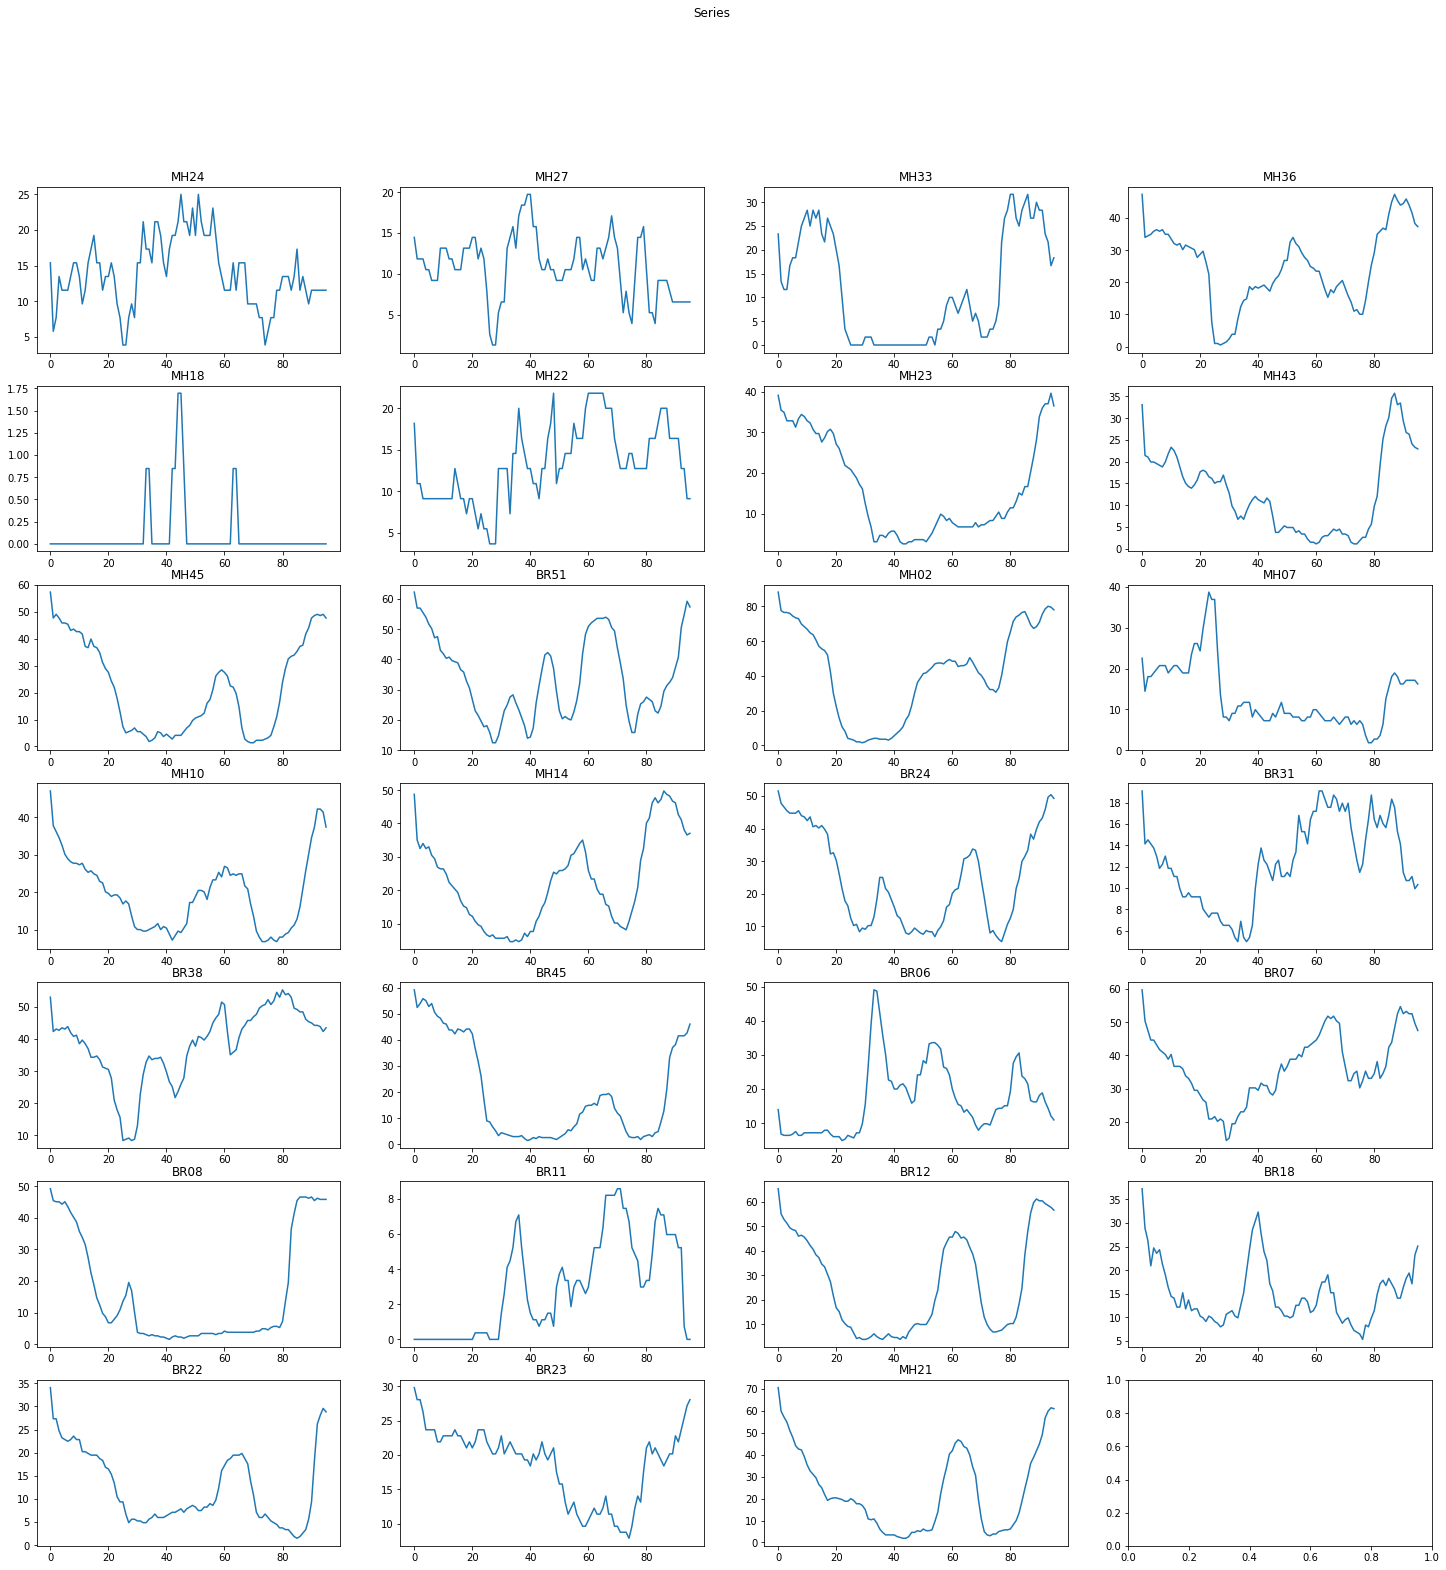

In [63]:
fig, axs = plt.subplots(7,4,figsize=(25,25))
fig.suptitle('Series')
for i in range(7):
    for j in range(4):
        if i*4+j+1>len(mySeries): # pass the others that we can't fill
            continue
        axs[i, j].plot(mySeries[i*4+j].values)
        axs[i, j].set_title(names[i*4+j])
plt.show()

In [359]:
fig.savefig(output_folder+'individual_hh_feature_plot.png')

In [60]:
pd.options.plotting.backend = "plotly"
df19['BR06'].plot()

In [32]:
from tslearn.clustering import TimeSeriesKMeans


In [35]:
df19 = pd.read_csv(input_folder+'feature1_2019.csv')
df20 = pd.read_csv(input_folder+'feature1_2020.csv')

df19['Unnamed: 0'] = pd.to_datetime(df19['Unnamed: 0'],format = '%H:%M:%S')
df19.index = df19['Unnamed: 0'].dt.time
df19 = df19.drop(['Unnamed: 0'],axis=1)
df20['Unnamed: 0'] = pd.to_datetime(df20['Unnamed: 0'],format = '%H:%M:%S')
df20.index = df20['Unnamed: 0'].dt.time
df20 = df20.drop(['Unnamed: 0'],axis=1)
df20 = df20.T
df19 = df19.T
copy19 = df19
copy20 = df20

In [79]:
df19

MH24       MH27       MH33       MH36       MH18       MH22  \
Unnamed: 0                                                                     
00:00:00    74.096386  73.575130  71.739130  72.514620  17.582418  62.427746   
00:15:00    57.926829  64.583333  50.000000  63.636364   9.497207  56.470588   
00:30:00    54.268293  63.541667  53.260870  63.636364  10.055866  56.470588   
00:45:00    53.939394  63.541667  53.260870  63.855422   8.379888  55.882353   
01:00:00    54.545455  63.020833  53.260870  63.855422   8.379888  52.941176   
...               ...        ...        ...        ...        ...        ...   
22:45:00    56.363636  65.104167  69.021739  62.650602  14.444444  56.725146   
23:00:00    57.575758  63.541667  69.021739  62.650602  12.777778  58.479532   
23:15:00    55.757576  65.104167  63.043478  65.060241  11.111111  59.064327   
23:30:00    55.151515  65.104167  57.065217  63.253012  10.000000  54.970760   
23:45:00    56.363636  64.248705  55.978261  62.874251   9.444444  52.046784   

                 MH23    MH43       MH45      BR51  ...       BR45  BR06  \
Unnamed: 0                                          ...                    
00:00:00    81.142857  33.125  70.666667  7.692308  ...  50.505051  11.2   
00:15:00    72.000000  23.750  62.666667  1.538462  ...  43.434343   5.6   
00:30:00    69.714286  23.125  62.000000  1.538462  ...  40.404040   5.6   
00:45:00    63.428571  23.125  62.000000  0.000000  ...  41.414141   4.8   
01:00:00    58.857143  22.500  59.333333  0.000000  ...  46.464646   4.8   
...               ...     ...        ...       ...  ...        ...   ...   
22:45:00    49.714286  24.375  59.333333  4.615385  ...  28.282828  11.2   
23:00:00    57.714286  23.125  60.000000  9.230769  ...  40.404040  11.2   
23:15:00    62.285714  22.500  57.333333  9.230769  ...  35.353535   8.8   
23:30:00    66.285714  22.500  58.666667  6.153846  ...  35.353535   8.0   
23:45:00    69.714286  23.125  58.666667  3.076923  ...  31.313131   6.4   

                 BR07       BR08      BR11       BR12       BR18       BR22  \
Unnamed: 0                                                                    
00:00:00    43.442623  50.793651  2.500000  44.961240  48.031496   4.545455   
00:15:00    40.163934  42.857143  1.666667  37.209302  40.944882   3.030303   
00:30:00    40.163934  43.650794  1.666667  37.984496  42.519685   0.000000   
00:45:00    38.524590  44.444444  1.666667  37.209302  43.307087   0.000000   
01:00:00    37.704918  44.444444  1.666667  37.209302  40.944882   0.000000   
...               ...        ...       ...        ...        ...        ...   
22:45:00    41.803279  47.619048  4.166667  44.186047  20.472441  10.606061   
23:00:00    39.344262  47.619048  1.666667  41.085271  23.622047  10.606061   
23:15:00    39.344262  47.619048  1.666667  39.534884  33.070866   9.090909   
23:30:00    39.344262  46.825397  1.666667  38.759690  36.220472   4.545455   
23:45:00    36.885246  46.031746  1.666667  37.984496  33.070866   3.030303   

                 BR23       MH21  
Unnamed: 0                        
00:00:00    44.186047  73.232323  
00:15:00    36.434109  62.436548  
00:30:00    35.658915  59.390863  
00:45:00    33.333333  57.868020  
01:00:00    33.333333  56.852792  
...               ...        ...  
22:45:00    36.434109  58.080808  
23:00:00    42.635659  65.656566  
23:15:00    43.410853  68.181818  
23:30:00    42.635659  67.676768  
23:45:00    41.085271  66.161616  

[96 rows x 27 columns]

In [30]:
# transposed df19 and df20 to make every single sample as a row

Soft-DTW k-means
2346067.871 --> 377058.985 --> 376193.679 --> 376127.526 --> 375994.988 --> 375928.878 --> 375895.930 --> 375965.692 --> 375766.641 --> 375766.239 --> 375663.126 --> 375665.273 --> 375655.790 --> 375645.738 --> 375645.129 --> 375646.859 --> 375646.051 --> 375647.553 --> 375646.601 --> 375647.458 --> 375646.892 --> 375647.439 --> 375647.061 --> 375647.365 --> 375647.152 --> 375647.353 --> 375647.214 --> 375647.344 --> 375647.247 --> 375647.321 --> 375647.257 --> 375647.308 --> 375647.266 --> 375647.301 --> 375647.273 --> 375647.297 --> 375647.278 --> 375647.295 --> 375647.282 --> 375647.294 --> 375647.285 --> 375647.294 --> 375647.288 --> 375647.294 --> 375647.292 --> 375647.294 --> 375647.294 --> 
[1, 2, 6, 10, 11]
[7, 16, 18]
[4, 9, 21, 24]
[0, 3, 5, 8, 12, 26]
[14, 15, 22]
[13, 17, 19, 20, 23, 25]


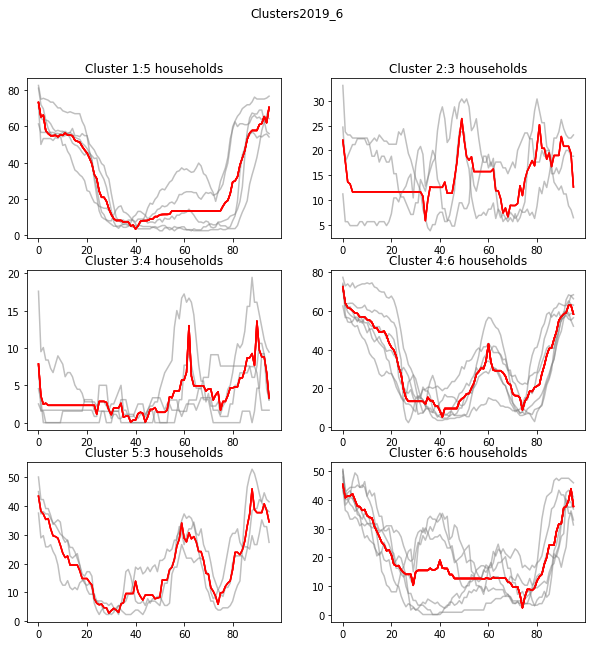

In [442]:
# give n_clusters, inputdf = df19 or df20, change filenames and title of the plots


seed = 0
print("Soft-DTW k-means")
X_train = np.array(df19)
sdtw_km = TimeSeriesKMeans(n_clusters=6,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True)
y_pred = sdtw_km.fit_predict(df19)

yi = list(np.unique(y_pred))
fig = plot_som_series_dba_center(X_train, y_pred, yi,'Clusters2019_6', 'clusters2019_6_softdtw.png')
copy19['cluster'] = y_pred
copy19.to_csv(output_folder+'predictions2019_6_softdtw.csv')

In [39]:
yi = list(np.unique(y_pred))
yi

[0, 1, 2, 3]

In [37]:
def duplicates(lst, item):
    return [i for i, x in enumerate(lst) if x == item]

Soft-DTW k-means
7376946.127 --> 1786725.516 --> 1741141.390 --> 1605652.982 --> 1603878.312 --> 1602178.490 --> 1602733.022 --> 1602724.750 --> 1602450.688 --> 1602811.283 --> 1602350.549 --> 1602910.049 --> 1602379.076 --> 1602805.284 --> 1599641.669 --> 1602682.638 --> 1600811.890 --> 1602256.325 --> 1601427.602 --> 1602453.809 --> 1601233.087 --> 1602598.247 --> 1602636.163 --> 1602900.802 --> 1602763.370 --> 1602912.785 --> 1602832.817 --> 1602916.770 --> 1602870.285 --> 1602918.058 --> 1602891.424 --> 1602918.537 --> 1602903.553 --> 1602917.483 --> 1602910.986 --> 1602919.208 --> 1602921.591 --> 1602920.349 --> 1602920.935 --> 1602920.343 --> 1602920.685 --> 1602920.289 --> 1602920.490 --> 1602920.290 --> 1602920.302 --> 1602920.302 --> 
[9, 21, 24]
[0, 1, 2, 3, 5, 6, 8, 10, 12, 22, 26]
[11, 13, 14, 17, 19, 20, 25]
[4, 7, 15, 16, 18, 23]


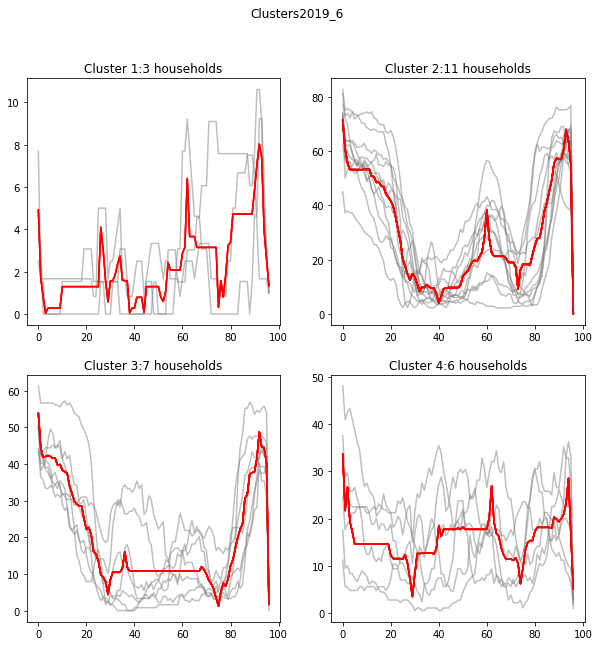

In [48]:
# copy of cluster code to revise whats happening

seed = 0
print("Soft-DTW k-means")
X_train = np.array(df19)
sdtw_km = TimeSeriesKMeans(n_clusters=4,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True)
y_pred = sdtw_km.fit_predict(df19)

yi = list(np.unique(y_pred))
fig = plot_som_series_dba_center(X_train, y_pred, yi,'Clusters2019_6', 'clusters2019_6_softdtw.png')
copy19['cluster'] = y_pred
# copy19.to_csv(output_folder+'predictions2019_6_softdtw.csv')

In [47]:
#have to change the value of the loop iter acc to the number of clusters i*j = num_clusters and also at plt.subplots

def plot_som_series_dba_center(X_train, y_pred, yi, title,filename):
    fig, axs = plt.subplots(3,1,figsize=(10,10))
    fig.suptitle(title)
    i = 0
    for x in range(3):
        for y in range(1):
            cluster = (x,y)
            ll = duplicates(y_pred,yi[i])
            print(ll)
            i = i+1
            for ind in ll:
                series = X_train[ind]
                axs[cluster].plot(series,c="gray",alpha=0.5) 
                axs[cluster].plot(dtw_barycenter_averaging(np.vstack(X_train[ll])),c="red") # I changed this part
            cluster_number = i
            lh = len(ll)
            axs[cluster].set_title(f"Cluster {cluster_number}:{lh} households")

    plt.show()
#     fig.savefig(output_folder+filename) # uncomment this if you want to save the plot